In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling 


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('C:\\Users\\hp\\Desktop\\analytixlabs\\Ml case study\\clustering\\CC_GENERAL.csv')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.drop(columns=['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE'],inplace=True)

In [6]:
conti=data.select_dtypes(['int64','float64'])

In [7]:
categ=data.select_dtypes(['object'])

In [8]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [9]:
conti.apply(lambda x:continuous_var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000
CASH_ADVANCE_TRX,8950.0,0.0,2.907700e+04,3.248827,0.000000,6.824647,4.657580e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000,15.000000,29.000000,123.00000
PURCHASES_TRX,8950.0,0.0,1.316530e+05,14.709832,7.000000,24.857649,6.179027e+02,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,17.000000,37.000000,57.000000,116.510000,358.00000
CREDIT_LIMIT,8949.0,1.0,4.022083e+07,4494.449450,3000.000000,3638.815725,1.324098e+07,50.000000,500.000000,1000.000000,1200.000000,1600.000000,3000.000000,6500.000000,9500.000000,12000.000000,17000.000000,30000.00000
PAYMENTS,8950.0,0.0,1.551164e+07,1733.143852,856.901546,2895.063757,8.381394e+06,0.000000,0.000000,89.988924,179.617069,383.276166,856.901546,1901.134317,3923.906642,6082.090595,13608.715541,50721.48336
MINIMUM_PAYMENTS,8637.0,313.0,7.464152e+06,864.206542,312.343947,2372.446607,5.628503e+06,0.019163,19.524478,73.282006,106.034864,169.123707,312.343947,825.485459,1780.651744,2766.563310,9034.098737,76406.20752


In [10]:
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [11]:
conti=conti.apply(lambda x:missing_imputation(x, stats = 'mean'))

In [12]:
conti=conti.apply(lambda x:x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
scaled=pd.DataFrame(StandardScaler().fit_transform(conti))

In [15]:
scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.255968,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.978471,-0.642945,-0.509902,-0.525551,0.360680
1,0.132501,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.711257,1.089747,0.248476,0.234227,0.360680
2,0.520970,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,0.852067,-0.456289,-0.113348,-0.525551,0.360680
3,-1.032906,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,0.852067,-0.732573,0.079266,-0.525551,0.360680
4,0.520970,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.922147,-0.431298,-0.424309,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.520970,1.269843,-0.678661,1.179833,-0.685371,-0.557505,-0.388884,-0.978471,-0.587964,-0.583577,1.183951,-4.122768
8946,0.520970,1.269843,-0.678661,1.179833,-0.685371,-0.557505,-0.388884,-0.978471,-0.610052,0.079266,-0.525551,-4.122768
8947,-0.191225,0.854576,-0.678661,0.760469,-0.685371,-0.557505,-0.436591,-0.978471,-0.696478,-0.556316,0.329200,-4.122768
8948,-0.191225,-1.221758,-0.678661,-0.916995,0.166976,-0.195410,-0.675130,-1.119282,-0.709234,-0.577993,0.329200,-4.122768


In [16]:
scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,7.328750e-15,-3.716084e-16,2.021052e-15,2.353921e-16,-6.906456e-16,-6.159877e-16,2.936385e-15,-2.576896e-15,2.169959e-16,4.790705e-17,-2.201566e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.363725e+00,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,-5.575046e-01,-6.751297e-01,-1.119282e+00,-7.325733e-01,-6.070285e-01,-5.255510e-01,-4.122768e+00
25%,4.617444e-02,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,-5.575046e-01,-6.274220e-01,-8.094985e-01,-5.623451e-01,-4.844164e-01,-5.255510e-01,3.606795e-01
50%,5.209700e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.853706e-01,-5.575046e-01,-3.411760e-01,-4.152286e-01,-3.519892e-01,-3.504602e-01,-5.255510e-01,3.606795e-01
75%,5.209700e-01,1.062211e+00,3.269728e-01,9.701506e-01,4.510881e-01,1.666850e-01,1.359008e-01,5.704461e-01,1.117962e-01,7.926635e-02,-3.712234e-02,3.606795e-01
max,5.209700e-01,1.269843e+00,2.673451e+00,1.599199e+00,3.576352e+00,4.692870e+00,4.883292e+00,3.527470e+00,5.311600e+00,6.390056e+00,2.893453e+00,3.606795e-01


In [17]:
pc = PCA(n_components=12)

In [18]:
pc.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pc.explained_variance_

array([3.25698782, 2.45267816, 1.21306107, 1.14257878, 0.89340387,
       0.84987719, 0.66553284, 0.58750805, 0.51077586, 0.27940625,
       0.1081762 , 0.04135484])

In [20]:
sum(pc.explained_variance_)

12.00134093194766

In [21]:
a= pc.explained_variance_ratio_
a

array([0.27138533, 0.20436701, 0.10107713, 0.09520426, 0.074442  ,
       0.07081519, 0.05545487, 0.04895353, 0.0425599 , 0.02328125,
       0.00901368, 0.00344585])

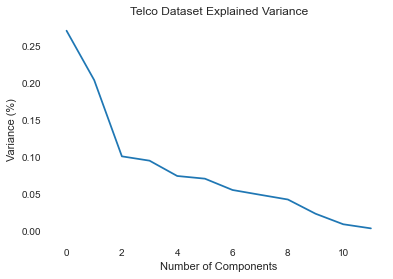

In [22]:
plt.figure()
plt.plot(a)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Telco Dataset Explained Variance')
plt.show()

In [23]:
a1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
a1

array([ 27.14,  47.58,  57.69,  67.21,  74.65,  81.73,  87.28,  92.18,
        96.44,  98.77,  99.67, 100.01])

In [24]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':a1}, index=range(1,13))

,Eigen_value,Cumm_variance
1,3.256988,27.14
2,2.452678,47.58
3,1.213061,57.69
4,1.142579,67.21
5,0.893404,74.65
6,0.849877,81.73
7,0.665533,87.28
8,0.587508,92.18
9,0.510776,96.44
10,0.279406,98.77


In [25]:
pc_final=PCA(n_components=6).fit(scaled)

In [26]:
pc_final.explained_variance_

array([3.25698782, 2.45267816, 1.21306107, 1.14257878, 0.89340387,
       0.84987719])

In [27]:
reduced=pc_final.fit_transform(scaled)

In [28]:
dimensions = pd.DataFrame(reduced)

In [29]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5","C6"]

In [30]:
print(scaled.shape)
print(dimensions.shape)
print(dimensions.head())

(8950, 12)
(8950, 6)
         C1        C2        C3        C4        C5        C6
0 -1.338959 -1.424554 -0.120782 -0.742369 -0.341345 -0.108133
1 -1.289623  1.031839  1.152048 -0.451426  0.246248 -0.505058
2  1.455537  0.049127  0.494299 -0.810730 -2.065341  1.352776
3 -1.398908 -0.504185  0.988767 -0.984620  0.194477  0.448986
4 -1.298644 -1.048435 -0.223657 -0.921765 -0.846878 -0.059375


In [31]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=conti.columns).T

In [32]:
Loadings.to_excel("Loadings.xlsx")

In [33]:
from factor_analyzer import FactorAnalyzer

corrm=pd.DataFrame(scaled).corr()
corrm

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.232890,0.202845,0.179472,0.193894,0.162818,0.212610,0.098319,0.092491,0.180278,-0.098040,0.121525
1,0.232890,1.000000,0.501343,0.862934,-0.312493,-0.238395,0.642234,0.119602,0.120897,-0.005151,0.305802,0.061506
2,0.202845,0.501343,1.000000,0.142329,-0.113575,-0.081339,0.601289,0.296099,0.278313,-0.020531,0.157531,0.082466
3,0.179472,0.862934,0.142329,1.000000,-0.265907,-0.200169,0.593674,0.060236,0.097830,0.027540,0.250087,0.073275
4,0.193894,-0.312493,-0.113575,-0.265907,1.000000,0.881092,-0.151307,0.134741,0.215544,0.203236,-0.253292,-0.129136
5,0.162818,-0.238395,-0.081339,-0.200169,0.881092,1.000000,-0.096709,0.160611,0.274589,0.236233,-0.201056,-0.051821
6,0.212610,0.642234,0.601289,0.593674,-0.151307,-0.096709,1.000000,0.280396,0.387365,0.118396,0.179559,0.135331
7,0.098319,0.119602,0.296099,0.060236,0.134741,0.160611,0.280396,1.000000,0.439015,0.208520,0.053164,0.142207
8,0.092491,0.120897,0.278313,0.097830,0.215544,0.274589,0.387365,0.439015,1.000000,0.219871,0.116842,0.126778
9,0.180278,-0.005151,-0.020531,0.027540,0.203236,0.236233,0.118396,0.208520,0.219871,1.000000,-0.224117,0.083715


In [34]:
eigen_values = np.linalg.eigvals(corrm)
eigen_values_cumvar = (eigen_values/corrm.shape[0]).cumsum()
pd.DataFrame({'Eigen_value': eigen_values, 'Cumm_variance':eigen_values_cumvar}, index=range(1,13))

,Eigen_value,Cumm_variance
1,3.256624,0.271385
2,2.452404,0.475752
3,1.212926,0.576829
4,1.142451,0.672034
5,0.041350,0.675480
6,0.108164,0.684493
7,0.279375,0.707775
8,0.893304,0.782217
9,0.849782,0.853032
10,0.665458,0.908487


In [35]:
fa = FactorAnalyzer(n_factors=9,rotation='varimax',method='principal').fit(corrm)

In [36]:
loadings=pd.DataFrame(fa.loadings_,columns=["Fctr1","Fctr2","Fctr3","Fctr4","Fctr5","Fctr6","Fctr7","Fctr8","Fctr9"])
                      

In [37]:
loadings

,Fctr1,Fctr2,Fctr3,Fctr4,Fctr5,Fctr6,Fctr7,Fctr8,Fctr9
0,0.018342,0.067129,-0.019745,0.033314,0.117460,0.979036,-0.116148,-0.087815,0.000504
1,0.929905,-0.186706,-0.057282,0.240737,-0.126184,0.027313,-0.097889,-0.072375,-0.076318
2,0.420654,-0.184026,-0.013545,0.862337,-0.097969,0.047305,0.102081,0.150953,-0.012163
3,0.974253,-0.142225,-0.045817,-0.033602,-0.067800,0.004283,-0.094925,-0.115932,-0.012037
4,-0.753291,0.085313,-0.315192,-0.229137,0.506265,0.067517,0.090723,-0.018544,0.049335
5,-0.740371,0.086280,-0.294002,-0.241830,0.524387,0.017018,0.117328,-0.027999,0.046484
6,0.830354,-0.076423,-0.000954,0.451242,-0.035436,0.008178,0.177900,0.060361,0.253780
7,-0.071631,0.070303,0.015726,0.113005,0.030130,-0.091227,0.269939,0.945905,0.002909
8,-0.094829,0.060618,-0.048188,0.086948,0.046702,-0.128708,0.938316,0.279585,0.008545
9,-0.204081,0.947791,-0.032542,-0.145847,0.161974,0.056785,0.058656,0.064265,0.000848


In [38]:
loadings.to_excel('FA_loadings.xls')
fa.get_factor_variance()

(array([3.97816718, 1.23944894, 1.20588875, 1.16159442, 1.13795846,
        1.09185249, 1.05519924, 1.03862229, 0.07597575]),
 array([0.33151393, 0.10328741, 0.10049073, 0.09679953, 0.09482987,
        0.09098771, 0.08793327, 0.08655186, 0.00633131]),
 array([0.33151393, 0.43480134, 0.53529207, 0.63209161, 0.72692148,
        0.81790919, 0.90584246, 0.99239431, 0.99872563]))

In [39]:
km3=KMeans(n_clusters=3,random_state=123).fit(dimensions)

In [40]:
km3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [41]:
km3.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [42]:
km4=KMeans(n_clusters=4,random_state=123).fit(dimensions)

km5=KMeans(n_clusters=5,random_state=123).fit(dimensions)

km6=KMeans(n_clusters=6,random_state=123).fit(dimensions)

km7=KMeans(n_clusters=7,random_state=123).fit(dimensions)

km8=KMeans(n_clusters=8,random_state=123).fit(dimensions)

In [43]:
conti['cluster_3'] = km3.labels_
conti['cluster_4'] = km4.labels_
conti['cluster_5'] = km5.labels_
conti['cluster_6'] = km6.labels_
conti['cluster_7'] = km7.labels_
conti['cluster_8'] = km8.labels_

In [44]:
conti.head(20)

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,1,2,1,1,0,7
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,1,2,1,1,0,7
2,1.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,0,0,2,2,1,6
3,0.636364,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,864.206542,0.000000,12,1,2,1,1,0,7
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1,2,1,1,0,7
5,1.000000,0.666667,0.000000,0.583333,0.000000,0,8.0,1800.0,1400.057770,2407.246035,0.000000,12,1,3,3,0,5,0
6,1.000000,1.000000,1.000000,1.000000,0.000000,0,64.0,13500.0,6354.314328,198.065894,1.000000,12,0,0,2,2,1,4
7,1.000000,1.000000,0.000000,1.000000,0.000000,0,12.0,2300.0,679.065082,532.033990,0.000000,12,0,3,3,0,5,0
8,1.000000,0.333333,0.083333,0.250000,0.000000,0,5.0,7000.0,688.278568,311.963409,0.000000,12,1,2,1,1,0,7
9,0.545455,0.166667,0.166667,0.000000,0.000000,0,3.0,11000.0,1164.770591,100.302262,0.000000,12,1,2,1,5,6,5


In [45]:
pd.Series(km3.labels_).value_counts()/sum(pd.Series(km3.labels_).value_counts())

1    0.468156
0    0.382905
2    0.148939
dtype: float64

In [46]:
pd.Series(km4.labels_).value_counts()/sum(pd.Series(km4.labels_).value_counts())

2    0.430168
3    0.266145
0    0.161117
1    0.142570
dtype: float64

In [47]:
pd.Series(km5.labels_).value_counts()/sum(pd.Series(km5.labels_).value_counts())

1    0.399665
3    0.246927
2    0.152737
0    0.126257
4    0.074413
dtype: float64

In [48]:
pd.Series(km6.labels_).value_counts()/sum(pd.Series(km6.labels_).value_counts())

1    0.319106
0    0.226592
2    0.146480
5    0.130168
3    0.105028
4    0.072626
dtype: float64

In [49]:
from sklearn import metrics
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, km.labels_))

In [50]:
scores

[0.25933592290745966,
 0.25490991379957034,
 0.25424176376861374,
 0.27222635212235813,
 0.2728837551219403,
 0.2822725774272312,
 0.27676704732795293,
 0.25668964488181095,
 0.2504433389803933,
 0.24869142883381187,
 0.25446017089851886,
 0.2508026856608332,
 0.25464376865589244,
 0.2593062593009812,
 0.25154650214156,
 0.24208543787347372,
 0.23713507476842888,
 0.2440274571638898]

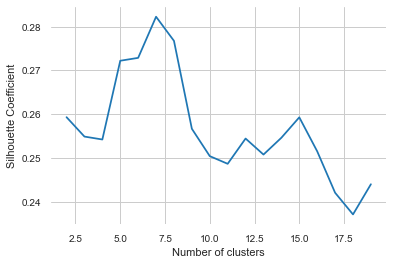

In [51]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [52]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dimensions )
    cluster_errors.append( clusters.inertia_ )

In [53]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,66734.039894
1,3,55722.573729
2,4,47770.504769
3,5,42152.744477
4,6,37558.726228
5,7,34124.942891
6,8,31779.812108
7,9,29782.518023
8,10,28037.262737
9,11,26818.798538


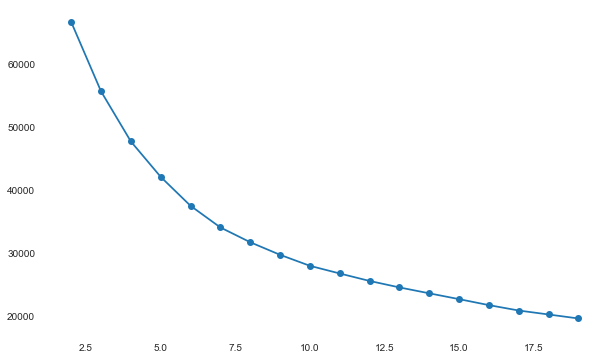

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [55]:
conti.cluster_6.value_counts()/sum(conti.cluster_5.value_counts())

1    0.319106
0    0.226592
2    0.146480
5    0.130168
3    0.105028
4    0.072626
Name: cluster_6, dtype: float64

In [56]:
km5.cluster_centers_

array([[-1.35736866,  2.80689756, -0.06704975,  0.34833234,  0.1554977 ,
        -0.52227262],
       [-1.12324389, -0.5271059 ,  0.35366521, -0.53770865, -0.17172105,
        -0.00488243],
       [ 2.8119713 ,  0.72398383,  0.58540786, -0.07104819, -0.65877152,
         0.48179964],
       [ 1.13199903, -0.82535383, -0.77927525,  0.01998185,  0.50883465,
        -0.55183432],
       [-1.18968867, -0.67633788, -0.39937506,  2.37633673,  0.3203938 ,
         1.75615601]])

In [57]:
conti.cluster_3.size

8950

In [58]:
size=pd.concat([pd.Series(conti.cluster_3.size), pd.Series.sort_index(conti.cluster_3.value_counts()), pd.Series.sort_index(conti.cluster_4.value_counts()),
           pd.Series.sort_index(conti.cluster_5.value_counts()), pd.Series.sort_index(conti.cluster_6.value_counts()),
           pd.Series.sort_index(conti.cluster_7.value_counts()), pd.Series.sort_index(conti.cluster_8.value_counts())])

In [59]:
size

0    8950
0    3427
1    4190
2    1333
0    1442
1    1276
2    3850
3    2382
0    1130
1    3577
2    1367
3    2210
4     666
0    2028
1    2856
2    1311
3     940
4     650
5    1165
0    2777
1    1269
2     283
3     920
4     644
5    1908
6    1149
0    1779
1     913
2     638
3     247
4     589
5    1121
6    1060
7    2603
dtype: int64

In [60]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/conti.cluster_3.size, columns=['Seg_Pct'])

In [61]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.382905,0.468156,0.148939,0.161117,0.14257,0.430168,0.266145,0.126257,0.399665,...,0.213184,0.12838,0.198771,0.102011,0.071285,0.027598,0.06581,0.125251,0.118436,0.290838


In [62]:
conti.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,1,2,1,1,0,7
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,1,2,1,1,0,7
2,1.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,0,0,2,2,1,6
3,0.636364,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,864.206542,0.000000,12,1,2,1,1,0,7
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1,2,1,1,0,7


In [63]:
Profling_output = pd.concat([conti.apply(lambda x: x.mean()).T, conti.groupby('cluster_3').apply(lambda x: x.mean()).T, conti.groupby('cluster_4').apply(lambda x: x.mean()).T,
          conti.groupby('cluster_5').apply(lambda x: x.mean()).T, conti.groupby('cluster_6').apply(lambda x: x.mean()).T,
          conti.groupby('cluster_7').apply(lambda x: x.mean()).T, conti.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [64]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE_FREQUENCY,0.878083,0.961902,0.781600,0.965867,0.978591,0.965911,0.790104,0.912391,0.974249,0.804173,...,0.947273,0.387706,0.940861,0.975996,0.781741,0.986955,0.987833,0.386629,0.971591,0.962854
PURCHASES_FREQUENCY,0.490351,0.917232,0.213180,0.264110,0.931513,0.245024,0.174589,0.865062,0.254028,0.178426,...,0.897514,0.258895,0.905660,0.239132,0.398998,0.636901,0.975918,0.253512,0.842467,0.151843
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.367571,0.089351,0.133498,0.736470,0.119948,0.099627,0.089584,0.121737,0.099206,...,0.097977,0.074084,0.070587,0.121754,0.122087,0.130495,0.773009,0.071697,0.679679,0.080293
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.741318,0.119137,0.166568,0.604337,0.153614,0.073786,0.801919,0.164708,0.078774,...,0.843856,0.175772,0.864766,0.145896,0.263881,0.579096,0.814278,0.172862,0.396933,0.070903
CASH_ADVANCE_FREQUENCY,0.134017,0.044379,0.091584,0.497845,0.062447,0.503424,0.098065,0.037565,0.503518,0.095305,...,0.036453,0.030164,0.036123,0.538566,0.201886,0.146710,0.079356,0.029059,0.047372,0.134040
CASH_ADVANCE_TRX,3.079330,0.844470,1.612888,13.434359,1.309293,13.623824,1.728312,0.685978,14.155752,1.746436,...,0.676625,0.626632,0.677347,15.308872,3.355799,4.380567,1.940577,0.598573,0.840566,2.477910
PURCHASES_TRX,14.151385,29.729895,3.530549,7.485034,45.568925,6.304475,3.133766,17.143157,6.969044,3.274811,...,18.869497,4.156658,18.594716,6.031763,5.097179,26.982308,67.863769,4.111508,24.943877,2.739147
CREDIT_LIMIT,4474.421517,4944.570317,3450.411828,6484.474528,7564.249149,6324.533343,3556.596827,3096.315273,6708.543846,3677.137266,...,3250.325053,4172.706218,3173.911402,6663.422284,2582.781269,6515.384615,9249.660441,4198.786302,5628.546312,3433.621462
PAYMENTS,1649.420364,1938.744360,940.887126,3132.721889,3385.416639,3001.149101,983.371535,950.921412,3289.742648,1037.688666,...,1015.886754,1308.689380,983.615596,3332.033677,602.218664,3117.429929,5184.648155,1320.085487,1755.047914,930.529497
MINIMUM_PAYMENTS,766.706247,719.143651,547.630871,1577.601100,841.926633,1553.743707,551.161660,647.948507,1696.172055,568.607076,...,464.323083,273.010011,470.832630,1359.970732,389.893771,6291.165225,831.575657,268.793267,530.133599,625.059323


In [65]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [66]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,3427.000000,4190.000000,1333.000000,1442.000000,1276.000000,3850.000000,2382.000000,1130.000000,3577.000000,...,1908.000000,1149.000000,1779.000000,913.000000,638.000000,247.000000,589.000000,1121.000000,1060.000000,2603.000000
Seg_Pct,1.000000,0.382905,0.468156,0.148939,0.161117,0.142570,0.430168,0.266145,0.126257,0.399665,...,0.213184,0.128380,0.198771,0.102011,0.071285,0.027598,0.065810,0.125251,0.118436,0.290838
BALANCE_FREQUENCY,0.878083,0.961902,0.781600,0.965867,0.978591,0.965911,0.790104,0.912391,0.974249,0.804173,...,0.947273,0.387706,0.940861,0.975996,0.781741,0.986955,0.987833,0.386629,0.971591,0.962854
PURCHASES_FREQUENCY,0.490351,0.917232,0.213180,0.264110,0.931513,0.245024,0.174589,0.865062,0.254028,0.178426,...,0.897514,0.258895,0.905660,0.239132,0.398998,0.636901,0.975918,0.253512,0.842467,0.151843
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.367571,0.089351,0.133498,0.736470,0.119948,0.099627,0.089584,0.121737,0.099206,...,0.097977,0.074084,0.070587,0.121754,0.122087,0.130495,0.773009,0.071697,0.679679,0.080293
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.741318,0.119137,0.166568,0.604337,0.153614,0.073786,0.801919,0.164708,0.078774,...,0.843856,0.175772,0.864766,0.145896,0.263881,0.579096,0.814278,0.172862,0.396933,0.070903
CASH_ADVANCE_FREQUENCY,0.134017,0.044379,0.091584,0.497845,0.062447,0.503424,0.098065,0.037565,0.503518,0.095305,...,0.036453,0.030164,0.036123,0.538566,0.201886,0.146710,0.079356,0.029059,0.047372,0.134040
CASH_ADVANCE_TRX,3.079330,0.844470,1.612888,13.434359,1.309293,13.623824,1.728312,0.685978,14.155752,1.746436,...,0.676625,0.626632,0.677347,15.308872,3.355799,4.380567,1.940577,0.598573,0.840566,2.477910
PURCHASES_TRX,14.151385,29.729895,3.530549,7.485034,45.568925,6.304475,3.133766,17.143157,6.969044,3.274811,...,18.869497,4.156658,18.594716,6.031763,5.097179,26.982308,67.863769,4.111508,24.943877,2.739147
CREDIT_LIMIT,4474.421517,4944.570317,3450.411828,6484.474528,7564.249149,6324.533343,3556.596827,3096.315273,6708.543846,3677.137266,...,3250.325053,4172.706218,3173.911402,6663.422284,2582.781269,6515.384615,9249.660441,4198.786302,5628.546312,3433.621462


In [67]:
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8']

In [68]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,3427.000000,4190.000000,1333.000000,1442.000000,1276.000000,3850.000000,2382.000000,1130.000000,3577.000000,...,1908.000000,1149.000000,1779.000000,913.000000,638.000000,247.000000,589.000000,1121.000000,1060.000000,2603.000000
Seg_Pct,1.000000,0.382905,0.468156,0.148939,0.161117,0.142570,0.430168,0.266145,0.126257,0.399665,...,0.213184,0.128380,0.198771,0.102011,0.071285,0.027598,0.065810,0.125251,0.118436,0.290838
BALANCE_FREQUENCY,0.878083,0.961902,0.781600,0.965867,0.978591,0.965911,0.790104,0.912391,0.974249,0.804173,...,0.947273,0.387706,0.940861,0.975996,0.781741,0.986955,0.987833,0.386629,0.971591,0.962854
PURCHASES_FREQUENCY,0.490351,0.917232,0.213180,0.264110,0.931513,0.245024,0.174589,0.865062,0.254028,0.178426,...,0.897514,0.258895,0.905660,0.239132,0.398998,0.636901,0.975918,0.253512,0.842467,0.151843
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.367571,0.089351,0.133498,0.736470,0.119948,0.099627,0.089584,0.121737,0.099206,...,0.097977,0.074084,0.070587,0.121754,0.122087,0.130495,0.773009,0.071697,0.679679,0.080293
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.741318,0.119137,0.166568,0.604337,0.153614,0.073786,0.801919,0.164708,0.078774,...,0.843856,0.175772,0.864766,0.145896,0.263881,0.579096,0.814278,0.172862,0.396933,0.070903
CASH_ADVANCE_FREQUENCY,0.134017,0.044379,0.091584,0.497845,0.062447,0.503424,0.098065,0.037565,0.503518,0.095305,...,0.036453,0.030164,0.036123,0.538566,0.201886,0.146710,0.079356,0.029059,0.047372,0.134040
CASH_ADVANCE_TRX,3.079330,0.844470,1.612888,13.434359,1.309293,13.623824,1.728312,0.685978,14.155752,1.746436,...,0.676625,0.626632,0.677347,15.308872,3.355799,4.380567,1.940577,0.598573,0.840566,2.477910
PURCHASES_TRX,14.151385,29.729895,3.530549,7.485034,45.568925,6.304475,3.133766,17.143157,6.969044,3.274811,...,18.869497,4.156658,18.594716,6.031763,5.097179,26.982308,67.863769,4.111508,24.943877,2.739147
CREDIT_LIMIT,4474.421517,4944.570317,3450.411828,6484.474528,7564.249149,6324.533343,3556.596827,3096.315273,6708.543846,3677.137266,...,3250.325053,4172.706218,3173.911402,6663.422284,2582.781269,6515.384615,9249.660441,4198.786302,5628.546312,3433.621462


In [71]:
Profling_output_final.to_excel('Profiling_output123.xlsx')

# we will go with the 5 clusters as per doing analyisis in the profiling. 								
cluster1: shows that these customers has low purchase frequency and almost uses cash advance facility. We can give them offers on purchases								

cluster2: shows that these customers did not use services so we can give them offers to avial the services.					

cluster3: shows that these customers did not use cash advance facility but use all other facility.							

cluster4: shows that these customers uses only purchase services not others , we can give them offers or can also make them aware other good services.								

cluster5: shows that these customers uses only slightly services like purchase and cash advance with very low frequency, we can give them offers to enhance there usage.								
